<a href="https://colab.research.google.com/github/MrGharbiii/garbage_detection_keras/blob/main/garbage_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python


In [ ]:
!pip install pillow

In [ ]:
# prompt: i have a zip file in sample_data , i want to extrat and sample data

import zipfile
from google.colab import drive
import os

# Assuming the zip file is in /content/sample_data
zip_filepath = "/content/classification_garbage.zip" # Replace with actual zip file name

# Check if the file exists
if os.path.exists(zip_filepath):
  try:
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
      zip_ref.extractall("/content/extracted_files") #Extract to a subdirectory
      print(f"Successfully extracted files to: /content/extracted_files")
  except zipfile.BadZipFile:
    print(f"Error: {zip_filepath} is not a valid zip file.")
else:
  print(f"Error: File not found at {zip_filepath}.  Make sure it's in the /content directory.")


Successfully extracted files to: /content/extracted_files


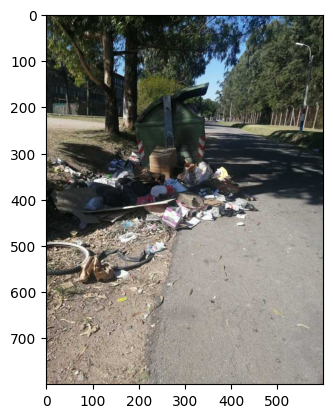

In [10]:
# prompt: print the first picture in the test folder

import cv2
import matplotlib.pyplot as plt
import os

# Specify the directory containing the images
image_dir = "/content/extracted_files/classification_garbage/classification_garbage/test"

# Check if the directory exists
if os.path.exists(image_dir):
  # Get a list of all files in the directory
  image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

  # Check if there are any image files in the directory
  if image_files:
    # Assuming the images are in a format that OpenCV can read
    first_image_path = os.path.join(image_dir, image_files[0])

    try:
      # Read the first image using OpenCV
      img = cv2.imread(first_image_path)

      # Convert BGR image to RGB for matplotlib
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      # Display the image using matplotlib
      plt.imshow(img_rgb)

      plt.show()

    except Exception as e:
      print(f"Error displaying image: {e}")

  else:
    print(f"No image files found in directory: {image_dir}")
else:
  print(f"Directory not found: {image_dir}")


In [29]:
# prompt: give me general infos about data , number of files in every folder , number of images per size , etc

import os
import zipfile

def get_directory_info(root_dir):
    """
    Provides general information about a directory structure, including file counts per folder and image size statistics.

    Args:
        root_dir: The path to the root directory to analyze.
    """

    image_sizes = {}
    total_files = 0
    total_images = 0

    for dirpath, dirnames, filenames in os.walk(root_dir):
        num_files = len(filenames)
        total_files += num_files
        print(f"Directory: {dirpath}, Number of files: {num_files}")

        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Check common image extensions
                total_images +=1
                try:
                    from PIL import Image
                    img = Image.open(filepath)
                    width, height = img.size
                    size_key = f"{width}x{height}"
                    image_sizes[size_key] = image_sizes.get(size_key, 0) + 1
                except Exception as e:
                    print(f"Error processing image {filename}: {e}")
    print(f"\nTotal number of files in the directory structure: {total_files}")
    print(f"Total number of images found: {total_images}")

    if image_sizes:
        print("\nImage Size Distribution:")
        for size, count in image_sizes.items():
            print(f"Size {size}: {count} images")
    else:
        print("\nNo images found in the directory structure.")


# Example usage (assuming extracted files are in /content/extracted_files):
extracted_files_dir = "/content/extracted_files"
if os.path.exists(extracted_files_dir):
    get_directory_info(extracted_files_dir)
else:
    print(f"Error: Directory '{extracted_files_dir}' not found.")


Directory: /content/extracted_files, Number of files: 0
Directory: /content/extracted_files/classification_garbage, Number of files: 0
Directory: /content/extracted_files/classification_garbage/classification_garbage, Number of files: 0
Directory: /content/extracted_files/classification_garbage/classification_garbage/test, Number of files: 100
Directory: /content/extracted_files/classification_garbage/classification_garbage/train, Number of files: 0
Directory: /content/extracted_files/classification_garbage/classification_garbage/train/no_label, Number of files: 560
Directory: /content/extracted_files/classification_garbage/classification_garbage/train/with_label, Number of files: 0
Directory: /content/extracted_files/classification_garbage/classification_garbage/train/with_label/dirty, Number of files: 20
Directory: /content/extracted_files/classification_garbage/classification_garbage/train/with_label/clean, Number of files: 20
Directory: /content/extracted_files/classification_garba

Found 40 files belonging to 2 classes.
Using 32 files for training.
Found 40 files belonging to 2 classes.
Using 8 files for validation.
Training initial model on labeled data...
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5833 - loss: 0.7508 - val_accuracy: 0.6250 - val_loss: 0.6594
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5625 - loss: 0.7398 - val_accuracy: 0.5000 - val_loss: 0.7094
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4583 - loss: 0.7489 - val_accuracy: 0.5000 - val_loss: 0.7074
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6875 - loss: 0.6260 - val_accuracy: 0.6250 - val_loss: 0.6477
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7500 - loss: 0.5964 - val_accuracy: 0.7500 - val_loss: 0.6520
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.7708 - loss: 0.5266 - val_accuracy: 0.7500 - val_loss: 0.6852
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.7500 - loss: 0.4629 - 

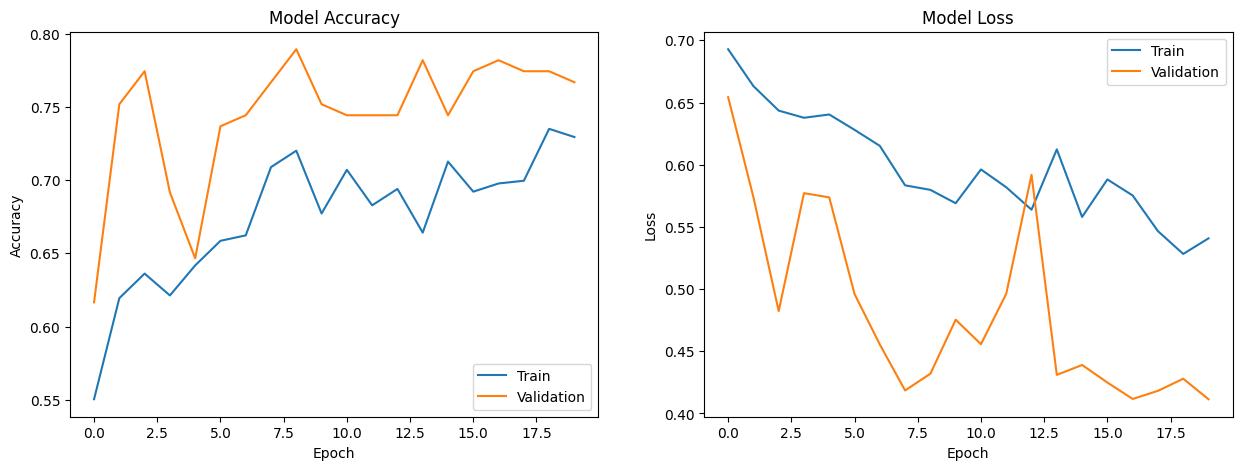

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np

# Set paths
BASE_PATH = '/content/extracted_files/classification_garbage/classification_garbage'
LABELED_TRAIN_PATH = os.path.join(BASE_PATH, 'train/with_label')
UNLABELED_TRAIN_PATH = os.path.join(BASE_PATH, 'train/no_label')
TEST_PATH = os.path.join(BASE_PATH, 'test')

# Create directories for pseudo-labeled data
PSEUDO_LABELED_PATH = os.path.join(BASE_PATH, 'pseudo_labeled')
os.makedirs(os.path.join(PSEUDO_LABELED_PATH, 'clean'), exist_ok=True)
os.makedirs(os.path.join(PSEUDO_LABELED_PATH, 'dirty'), exist_ok=True)

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16  # Smaller batch size due to less data

# Create initial dataset from labeled data
labeled_ds = image_dataset_from_directory(
    LABELED_TRAIN_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

labeled_val_ds = image_dataset_from_directory(
    LABELED_TRAIN_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
labeled_ds = labeled_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
labeled_val_ds = labeled_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create initial model
def create_model():
    model = models.Sequential([
        layers.Rescaling(1./255),
        layers.Conv2D(32, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Train initial model on labeled data
print("Training initial model on labeled data...")
initial_model = create_model()
initial_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

initial_history = initial_model.fit(
    labeled_ds,
    validation_data=labeled_val_ds,
    epochs=10
)

# Function to generate pseudo-labels
def generate_pseudo_labels():
    print("Generating pseudo-labels for unlabeled data...")
    unlabeled_files = [f for f in os.listdir(UNLABELED_TRAIN_PATH)
                      if f.endswith(('.jpg', '.jpeg', '.png'))]

    for file in unlabeled_files:
        img_path = os.path.join(UNLABELED_TRAIN_PATH, file)
        img = tf.keras.utils.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Get prediction
        prediction = initial_model.predict(img_array, verbose=0)

        # Determine destination folder
        dest_folder = 'clean' if prediction[0][0] < 0.5 else 'dirty'
        dest_path = os.path.join(PSEUDO_LABELED_PATH, dest_folder, file)

        # Copy file to appropriate folder
        shutil.copy2(img_path, dest_path)

# Generate pseudo-labels
generate_pseudo_labels()

# Create combined dataset (labeled + pseudo-labeled)
combined_train_ds = image_dataset_from_directory(
    PSEUDO_LABELED_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

combined_val_ds = image_dataset_from_directory(
    PSEUDO_LABELED_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Configure combined dataset
combined_train_ds = combined_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
combined_val_ds = combined_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create and train final model with data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

final_model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

final_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Training final model with pseudo-labeled data...")
final_history = final_model.fit(
    combined_train_ds,
    validation_data=combined_val_ds,
    epochs=20,

)

# Plot training results
def plot_training_results(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'])

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'])

    plt.show()

# Plot results
plot_training_results(final_history)

# Save the final model
final_model.save('garbage_classification_model.h5')

# Function to make predictions on new images
def predict_image(image_path):
    img = tf.keras.utils.load_img(
        image_path, target_size=(IMG_HEIGHT, IMG_WIDTH)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    prediction = final_model.predict(img_array)
    return "Clean" if prediction[0] < 0.5 else "Dirty"

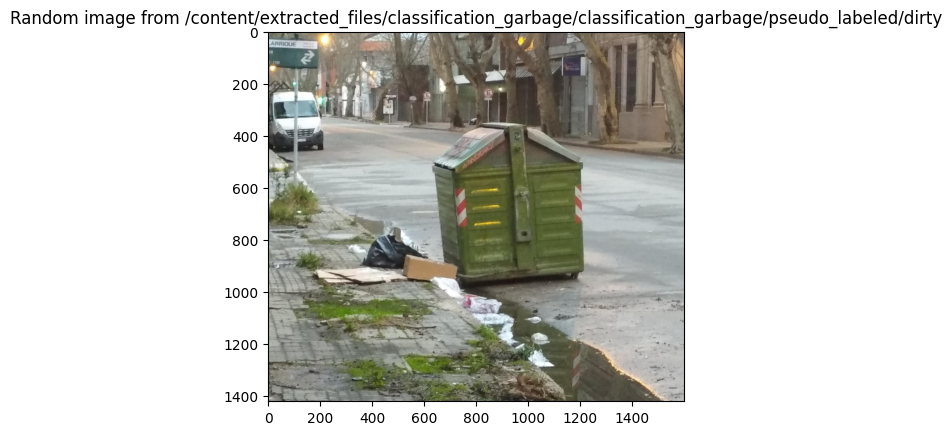

In [41]:
# prompt: get a random picture from the dirty in pseudo label folder and show it

import os
import random
import matplotlib.pyplot as plt
import cv2

# Path to the 'dirty' subdirectory within the pseudo-labeled data
dirty_dir = '/content/extracted_files/classification_garbage/classification_garbage/pseudo_labeled/dirty'

# Check if the directory exists
if os.path.exists(dirty_dir):
    # Get a list of image files in the 'dirty' directory
    image_files = [f for f in os.listdir(dirty_dir) if os.path.isfile(os.path.join(dirty_dir, f))]

    # Check if there are any image files
    if image_files:
        # Select a random image file
        random_image_file = random.choice(image_files)
        image_path = os.path.join(dirty_dir, random_image_file)

        try:
            # Read and display the image
            img = cv2.imread(image_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.title(f"Random image from {dirty_dir}")
            plt.show()

        except Exception as e:
            print(f"Error displaying image: {e}")

    else:
        print(f"No image files found in {dirty_dir}")
else:
    print(f"Directory not found: {dirty_dir}")


In [46]:
# prompt: create an input field to give you an image and classify it if dirty or clean with certitude level

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  image_path = fn # Use the uploaded filename directly
  prediction = predict_image(image_path)
  print(f"Prediction for {fn}: {prediction}")

  # Get the prediction confidence (probability)
  img = tf.keras.utils.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  prediction_probability = final_model.predict(img_array)[0][0]
  certitude = prediction_probability * 100 if prediction == "Dirty" else (1 - prediction_probability) * 100

  print(f"Certainty level for {prediction}: {certitude:.2f}%")


Saving WhatsApp Image 2020-09-30 at 4.07.03 PM.jpeg to WhatsApp Image 2020-09-30 at 4.07.03 PM (1).jpeg
User uploaded file "WhatsApp Image 2020-09-30 at 4.07.03 PM (1).jpeg" with length 331465 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Prediction for WhatsApp Image 2020-09-30 at 4.07.03 PM (1).jpeg: ('Dirty', 54.52320575714111)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Certainty level for ('Dirty', 54.52320575714111): 4.52%


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 677ms/step


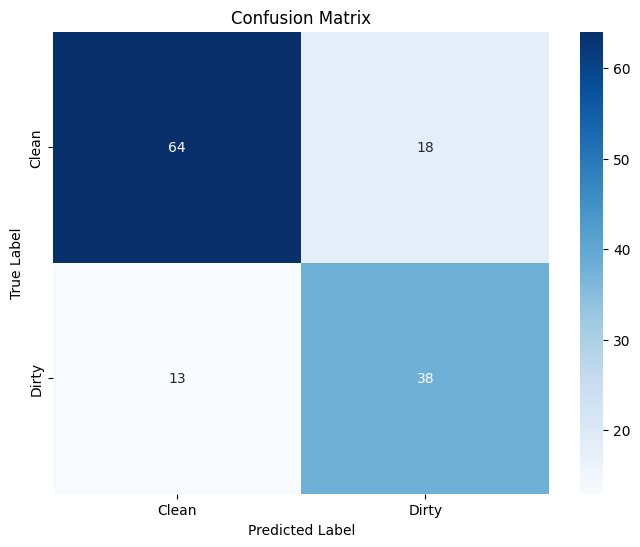

In [44]:
# prompt: give me confusion matrix of the model

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_model' and 'combined_val_ds' are defined as in your previous code

# Get predictions for the validation set
y_pred = np.round(final_model.predict(combined_val_ds))
y_true = np.concatenate([y for x, y in combined_val_ds], axis=0)


# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Clean', 'Dirty'], yticklabels=['Clean', 'Dirty'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
